In [48]:
mode = "real"
#mode = "test"
filename = r"C:\Users\jakel\Downloads\input-2025-8"

In [49]:
if mode == "real":
    with open(filename, "r") as f:
        lines = f.read().splitlines()
    part1_n = 1000
else:
    with open(r"..\test","r") as f:
        lines = f.read().splitlines()
    part1_n = 10

In [50]:
from itertools import count
class node:
    id_counter = count().__next__
    def __init__(self, coords):
        self._coords = coords
        self._id = node.id_counter()
        self._graph = graph(self)
        self.adj = []
    def __str__(self):
        return f"<{self._id}|{self._coords}>"
    def __repr__(self):
        return f"node({self._coords},{self._id})"
    @property
    def id(self):
        return self._id
    
    @property
    def graph(self):
        return self._graph
    @graph.setter
    def graph(self, graph):
        self._graph = graph
    
    def distance(self, other):
        return sum((b-a)**2 for a,b in zip(self._coords,other._coords))
    
    def connect(self, other: 'node'):
        self.adj.append(other)
        other.adj.append(self)
        self.graph.merge(other.graph)

class graph:
    """An unordered collection of nodes, representing a subgraph """
    id_counter = count().__next__
    def __init__(self, init_node):
        self._id = graph.id_counter()
        self._nodes = [init_node]

    def __len__(self):
        return len(self._nodes)
    def __str__(self):
        return f"[{self.graph_id}|{tuple(n.id for n in self._nodes)}]"

    def merge(self, other: 'graph'):
        for nod in other._nodes:
            nod.graph = self
        self._nodes += other._nodes

    @property
    def graph_id(self):
        return self._id

In [ ]:
from itertools import combinations

nodes = [node(tuple(int(x) for x in y.split(","))) for y in lines]
edges = []
for start,end in combinations(nodes,2):
    if start is end:
        continue
    edges.append((start.distance(end),start,end))
edges.sort(key=lambda x: x[0],reverse=True)

In [52]:
visited_nodes = []
for _ in range(part1_n):
    _, start, end = edges.pop()
    if start.graph is end.graph:
        #print("#",start.id,end.id)
        continue
    if start not in visited_nodes:
        visited_nodes.append(start)
    if end not in visited_nodes:
        visited_nodes.append(end)    
    start.connect(end)
     

Solution 1: 1000


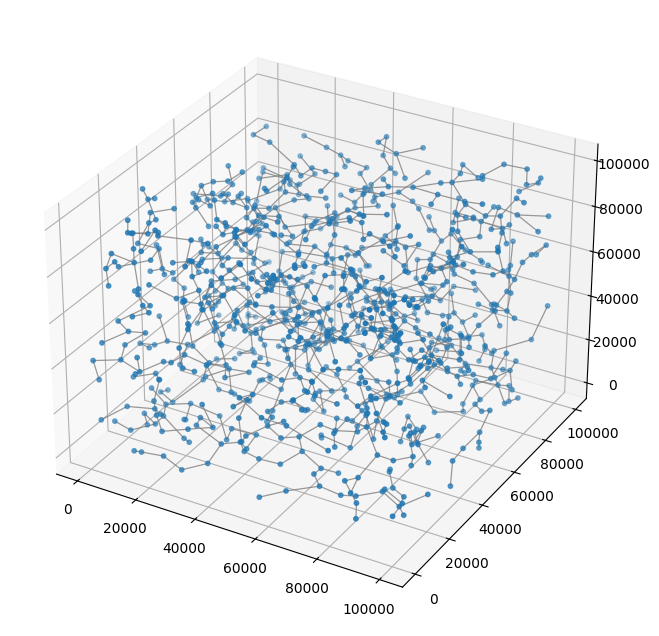

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # required to enable 3D projection
from functools import reduce
s = reduce(int.__mul__,map(len,sorted(list({n.graph for n in nodes}),key=len,reverse=True)[:3]))
print(f"Solution 1: {s}")
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# gather coordinates
coords = [n._coords for n in nodes]
xs, ys, zs = zip(*coords)

# plot nodes
ax.scatter(xs, ys, zs, c='C0', s=10, depthshade=True)

# plot edges (avoid duplicates by drawing only when start.id < end.id)
for n in nodes:
    for nbr in n.adj:
        if n.id < nbr.id:
            x = (n._coords[0], nbr._coords[0])
            y = (n._coords[1], nbr._coords[1])
            z = (n._coords[2], nbr._coords[2])
            ax.plot(x, y, z, c='gray', alpha=0.8, linewidth=0.9)
plt.show()

In [ ]:
while len(visited_nodes) < len(nodes):
    _, start, end = edges.pop()
    if start.graph is end.graph:
        continue
    if start not in visited_nodes:
        visited_nodes.append(start)
    if end not in visited_nodes:
        visited_nodes.append(end)    
    start.connect(end)


AttributeError: 'node' object has no attribute 'coords'

Solution 2: 4639477


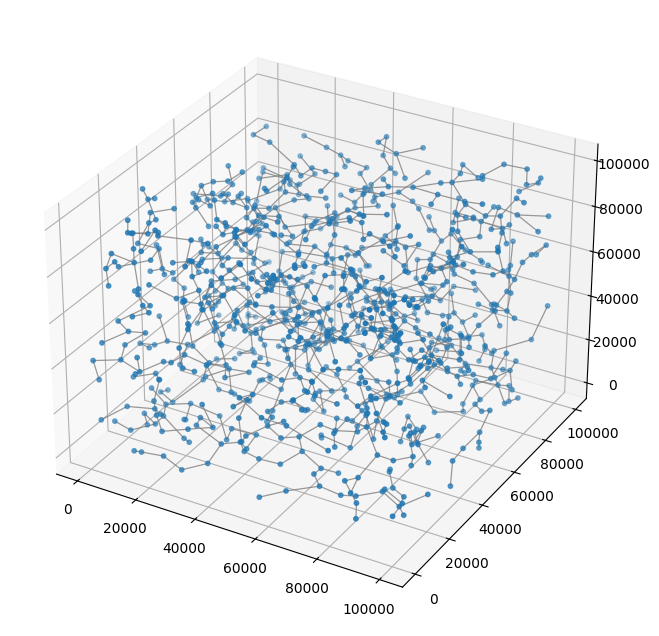

In [71]:
s = start._coords[0] * end._coords[0]
print(f"Solution 2: {s}")
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# gather coordinates
coords = [n._coords for n in nodes]
xs, ys, zs = zip(*coords)

# plot nodes
ax.scatter(xs, ys, zs, c='C0', s=10, depthshade=True)

# plot edges (avoid duplicates by drawing only when start.id < end.id)
for n in nodes:
    for nbr in n.adj:
        if n.id < nbr.id:
            x = (n._coords[0], nbr._coords[0])
            y = (n._coords[1], nbr._coords[1])
            z = (n._coords[2], nbr._coords[2])
            ax.plot(x, y, z, c='gray', alpha=0.8, linewidth=0.9)